In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context
sc.set_figure_params(dpi=300)
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.4.6 numpy==1.22.1 scipy==1.5.1 pandas==1.2.4 scikit-learn==1.0.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [2]:
yale = sc.read('./yale_annotated.h5ad')
yale = yale[yale.obs['Diagnosis'].isin(['Control', 'IPF'])]
yale

View of AnnData object with n_obs × n_vars = 215093 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.01', 'seurat_clusters', 'population', 'dataset', 'nCount_HTO', 'nFeature_HTO', 'SCT_snn_res.0.05', 'SCT_snn_res.0.02', 'Diagnosis', 'Status', 'Sample_Name', 'Age', 'Ethnicity', 'Smoking_status', 'Diagnosis2', 'dataset2', 'predicted.id', 'prediction.score.Lymphatic', 'prediction.score.Peribronchiolar', 'prediction.score.gCap', 'prediction.score.Arteriole', 'prediction.score.Venule', 'prediction.score.aCap', 'prediction.score.Secretory...MUC5B.', 'prediction.score.Basal', 'prediction.score.Secretory...SCGB3A2.', 'prediction.score.Proliferating.epithelial', 'prediction.score.PNEC.Ionocyte', 'prediction.score.AT2', 'prediction.score.KRT5..KRT17.', 'prediction.score.Transitional', 'prediction.score.Ciliated', 'prediction.score.Secretory...SCGB1A1..SCGB3A2.', 'prediction.score.AT1', 'prediction.score.Adventitial.FB', 'predi

In [3]:
vumc = sc.read('./vumc_ipf.h5ad')
vumc

AnnData object with n_obs × n_vars = 157629 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.01', 'seurat_clusters', 'population', 'dataset', 'nCount_HTO', 'nFeature_HTO', 'SCT_snn_res.0.05', 'SCT_snn_res.0.02', 'Diagnosis', 'Status', 'Sample_Name', 'Age', 'Ethnicity', 'Smoking_status', 'Diagnosis2', 'dataset2', 'predicted.id', 'prediction.score.Lymphatic', 'prediction.score.Peribronchiolar', 'prediction.score.gCap', 'prediction.score.Arteriole', 'prediction.score.Venule', 'prediction.score.aCap', 'prediction.score.Secretory...MUC5B.', 'prediction.score.Basal', 'prediction.score.Secretory...SCGB3A2.', 'prediction.score.Proliferating.epithelial', 'prediction.score.PNEC.Ionocyte', 'prediction.score.AT2', 'prediction.score.KRT5..KRT17.', 'prediction.score.Transitional', 'prediction.score.Ciliated', 'prediction.score.Secretory...SCGB1A1..SCGB3A2.', 'prediction.score.AT1', 'prediction.score.Adventitial.FB', 'prediction.sc

In [4]:
yale.obs['predicted.id'] = yale.obs['predicted.id'].astype('category')
vumc.obs['predicted.id'] = vumc.obs['predicted.id'].astype('category')

Trying to set attribute `.obs` of view, copying.


In [5]:
new_cluster_names =[
"AT1", "AT2",  "Basal", "Ciliated", "KRT5-/KRT17+", "PNEC/Ionocyte", "Proliferating epithelial", "Secretory - MUC5B+", "Secretory - SCGB1A1+/SCGB3A2+", "Secretory - SCGB3A2+","Transitional", 
"Arteriole", "aCap", 'gCap', 'Peribronchiolar', 'Venule', 'Lymphatic', "Adventitial FB", "FB - HAS1+", "FB - WNT2+", "MyoFB", "MyoFB - activated", "Mesothelial", "Pericyte", "SMC", "Proliferating FB",
"Macrophage", "Monocyte", "moDC", "cDC", "pDC", "Mast", "NK", "CD4", "CD8","Treg",  "B cells", "Plasma", "Proliferating immune"
]

yale.rename_categories('predicted.id', new_cluster_names)
vumc.rename_categories('predicted.id', new_cluster_names)

In [6]:
sc.external.pp.bbknn(yale, 'Sample_Name')
sc.external.pp.bbknn(vumc, 'Sample_Name')

In [7]:
sc.tl.umap(yale)
sc.tl.umap(vumc)

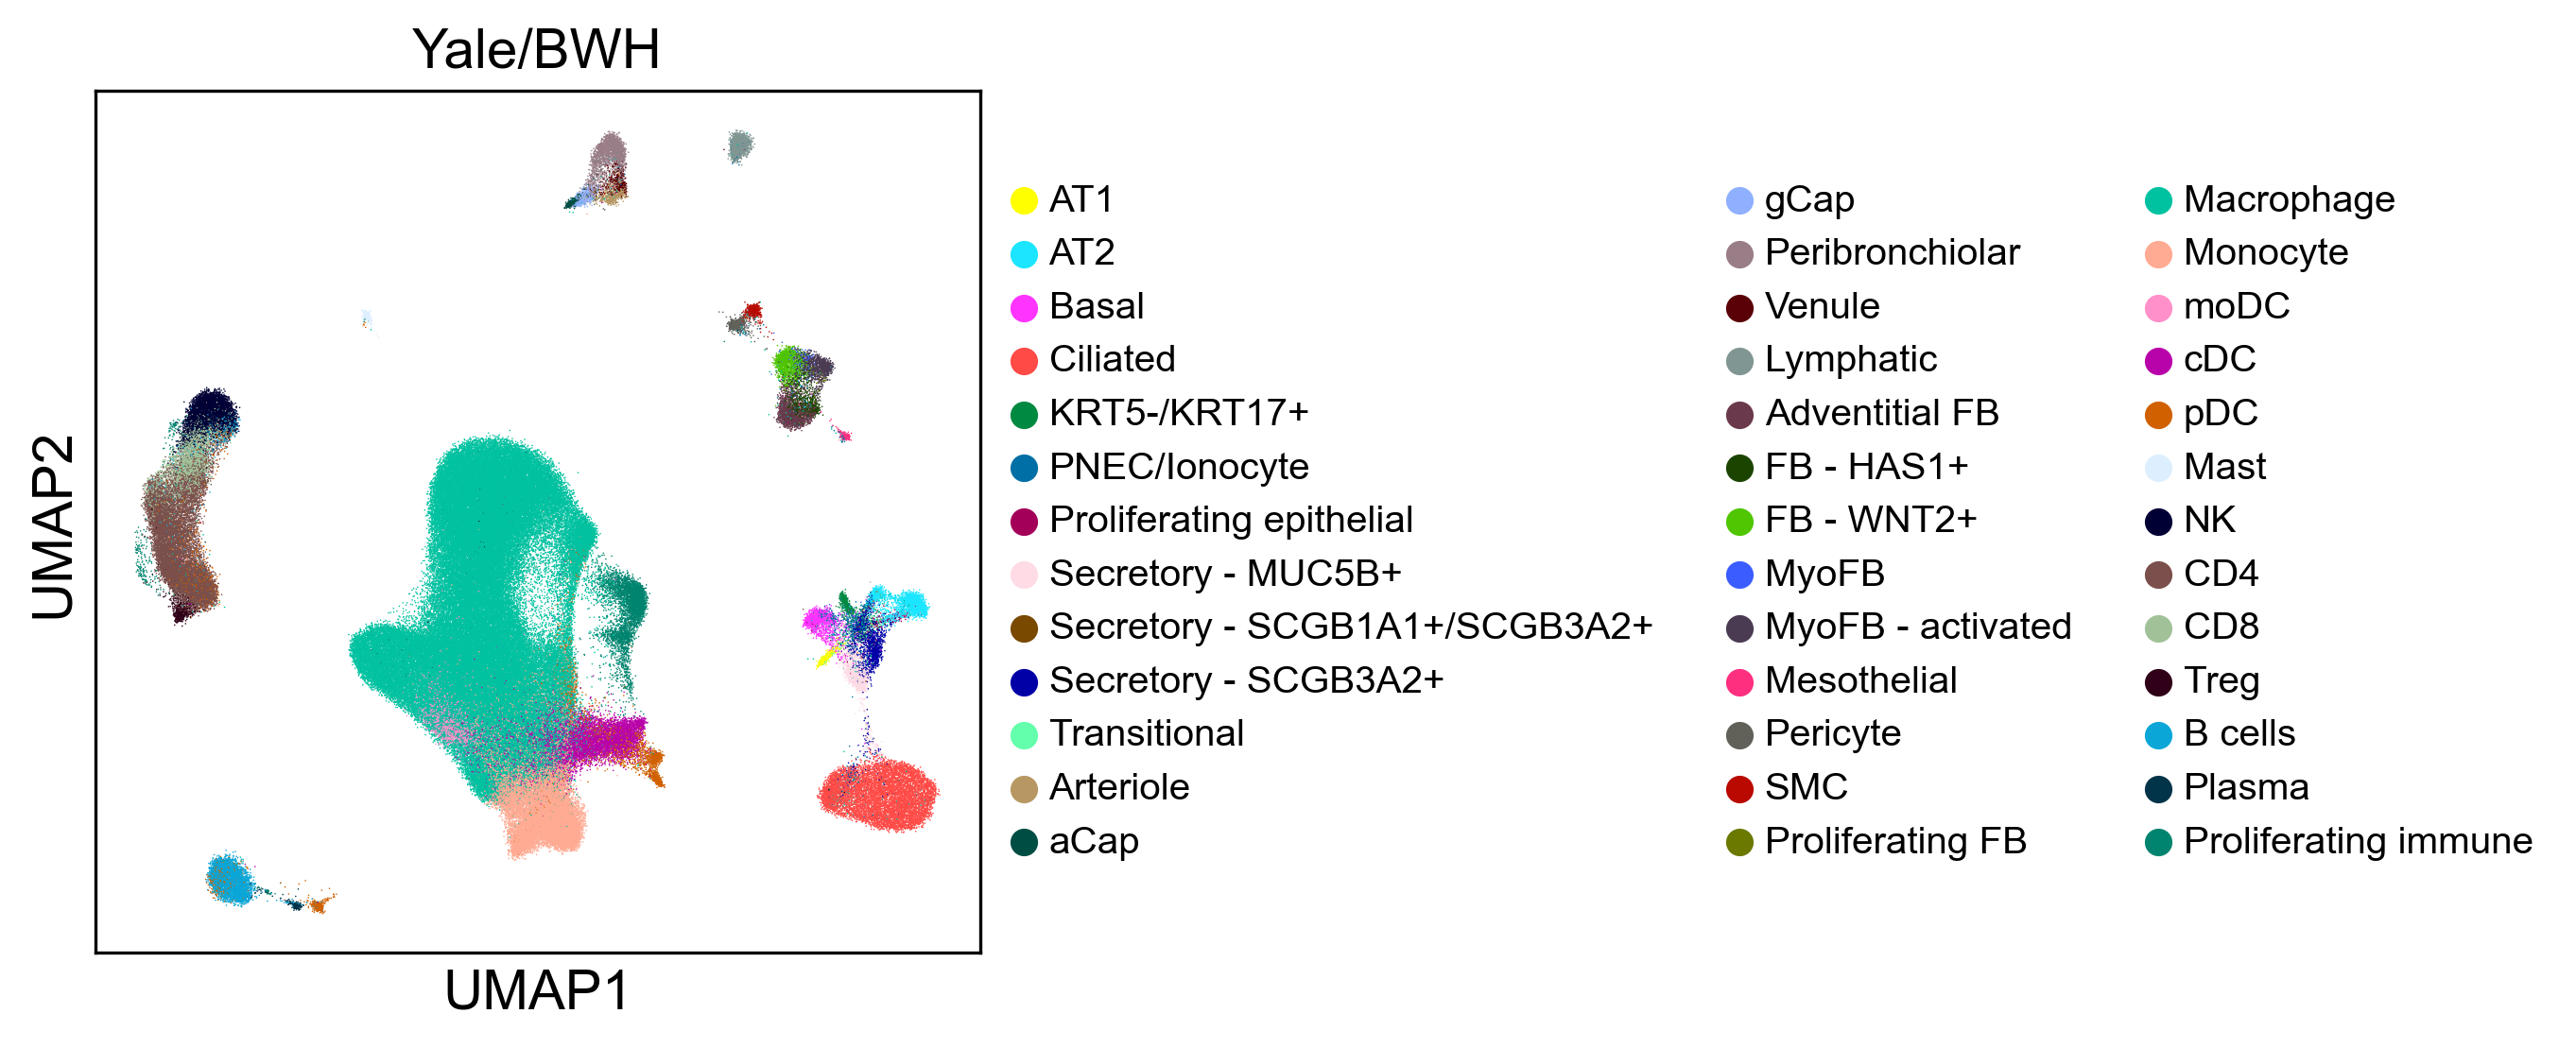

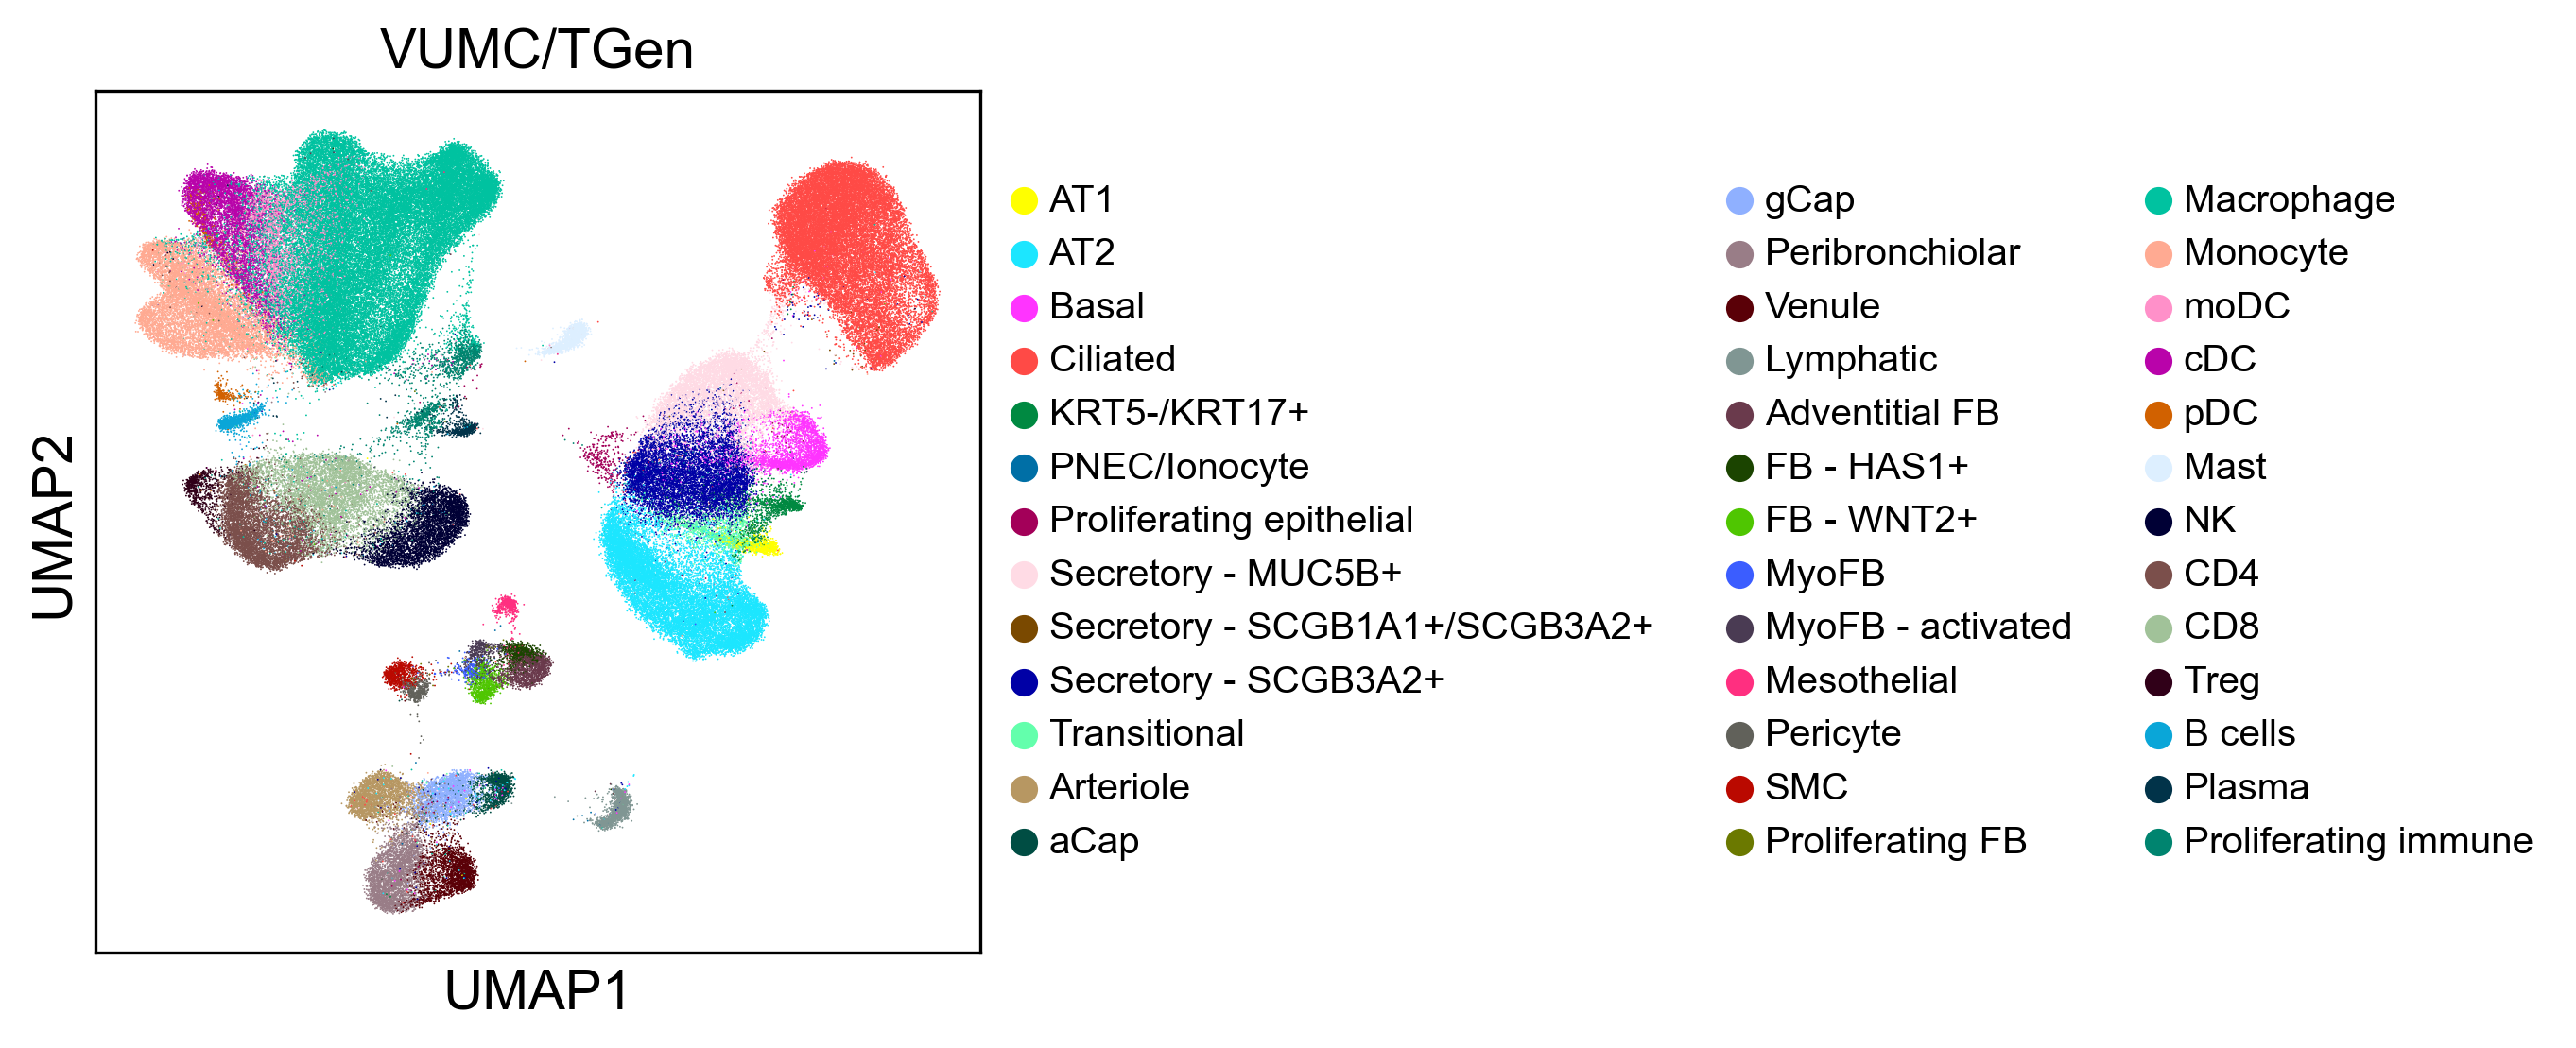

In [8]:
with rc_context({'figure.figsize': (4,4)}):
    sc.pl.umap(yale, color='predicted.id', title='Yale/BWH', legend_fontsize='x-small')
    sc.pl.umap(vumc, color='predicted.id', title='VUMC/TGen', legend_fontsize='x-small')

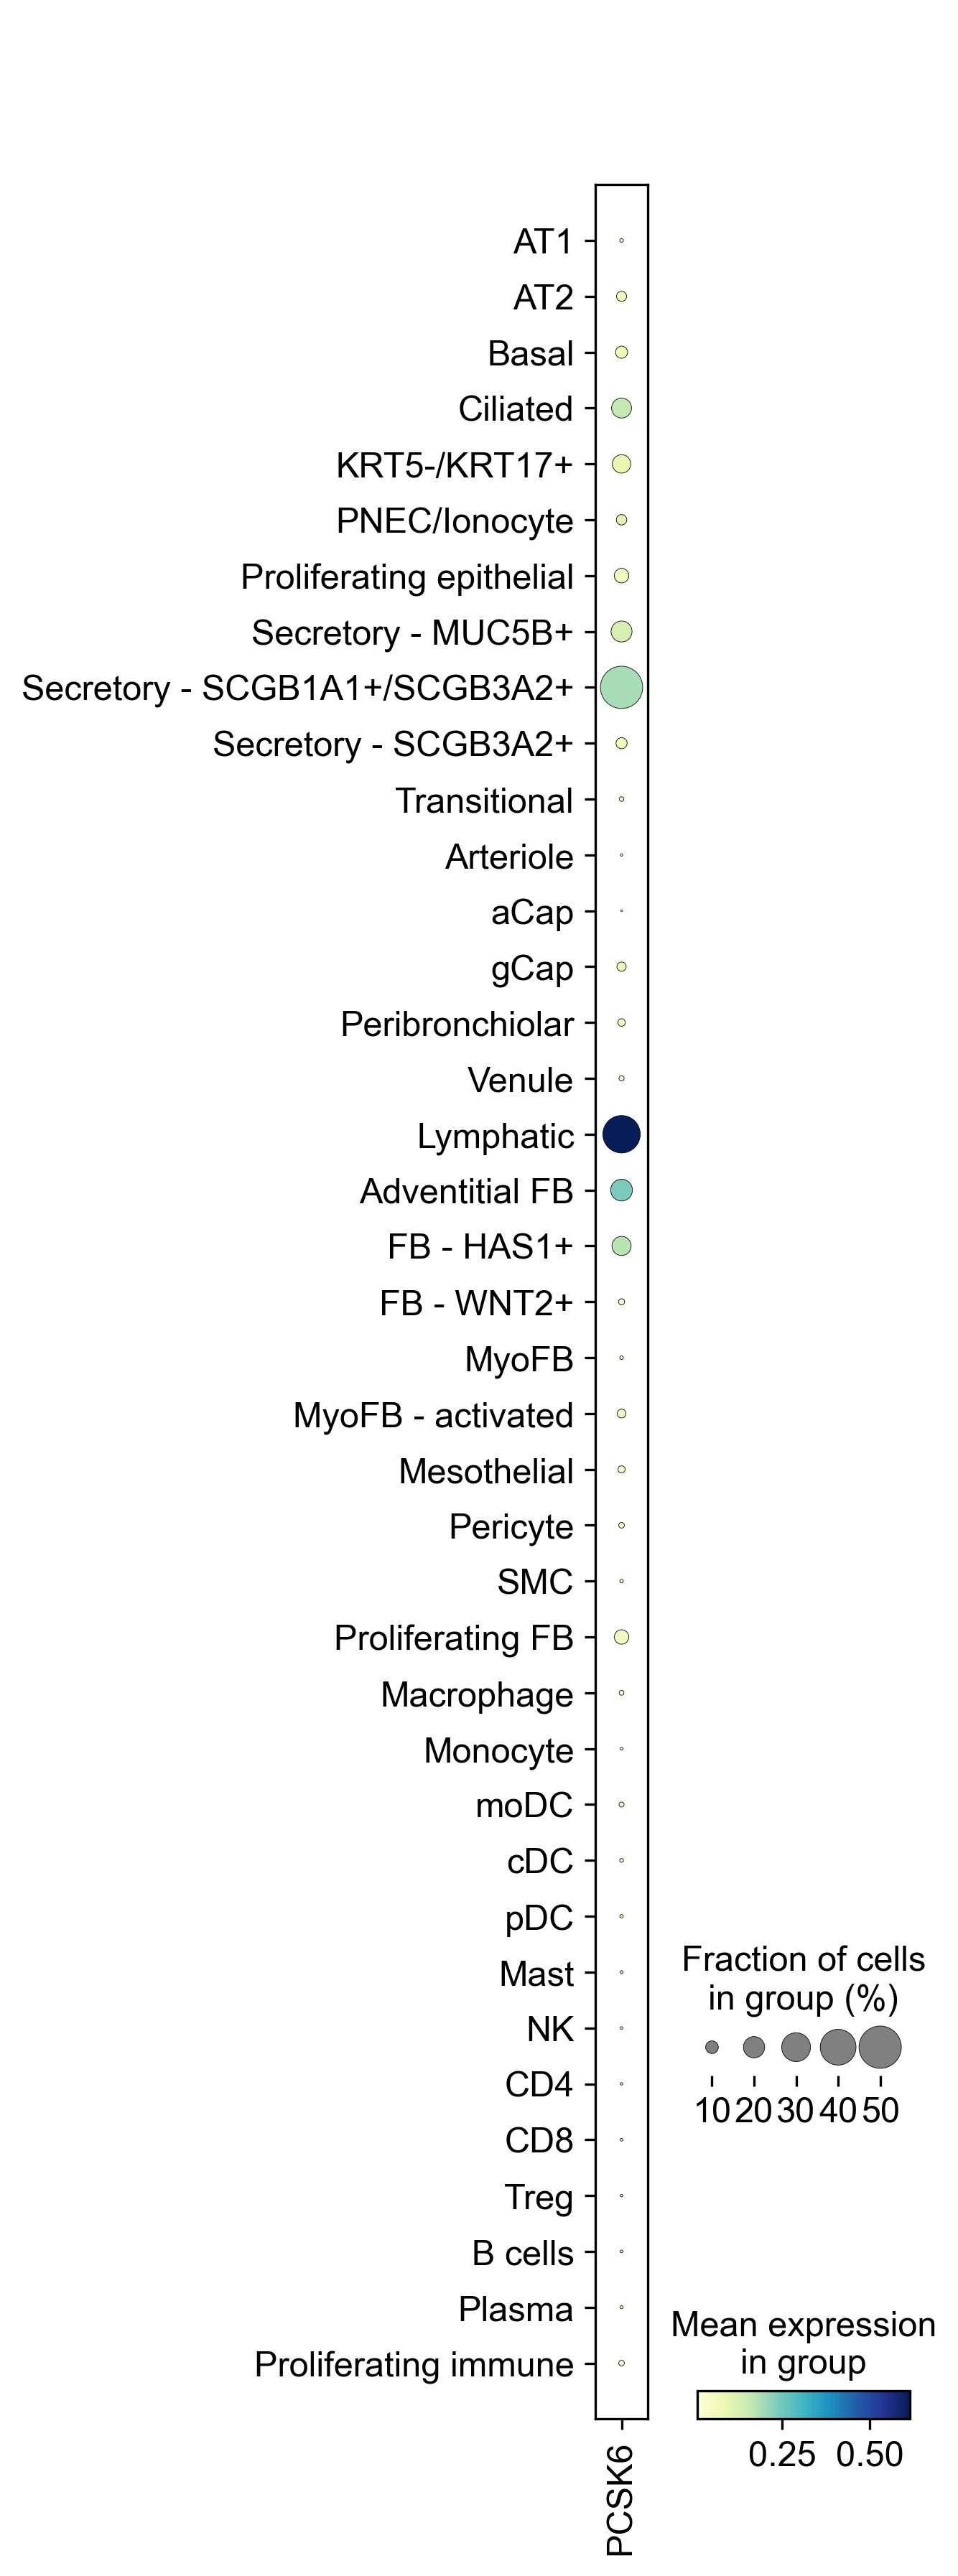

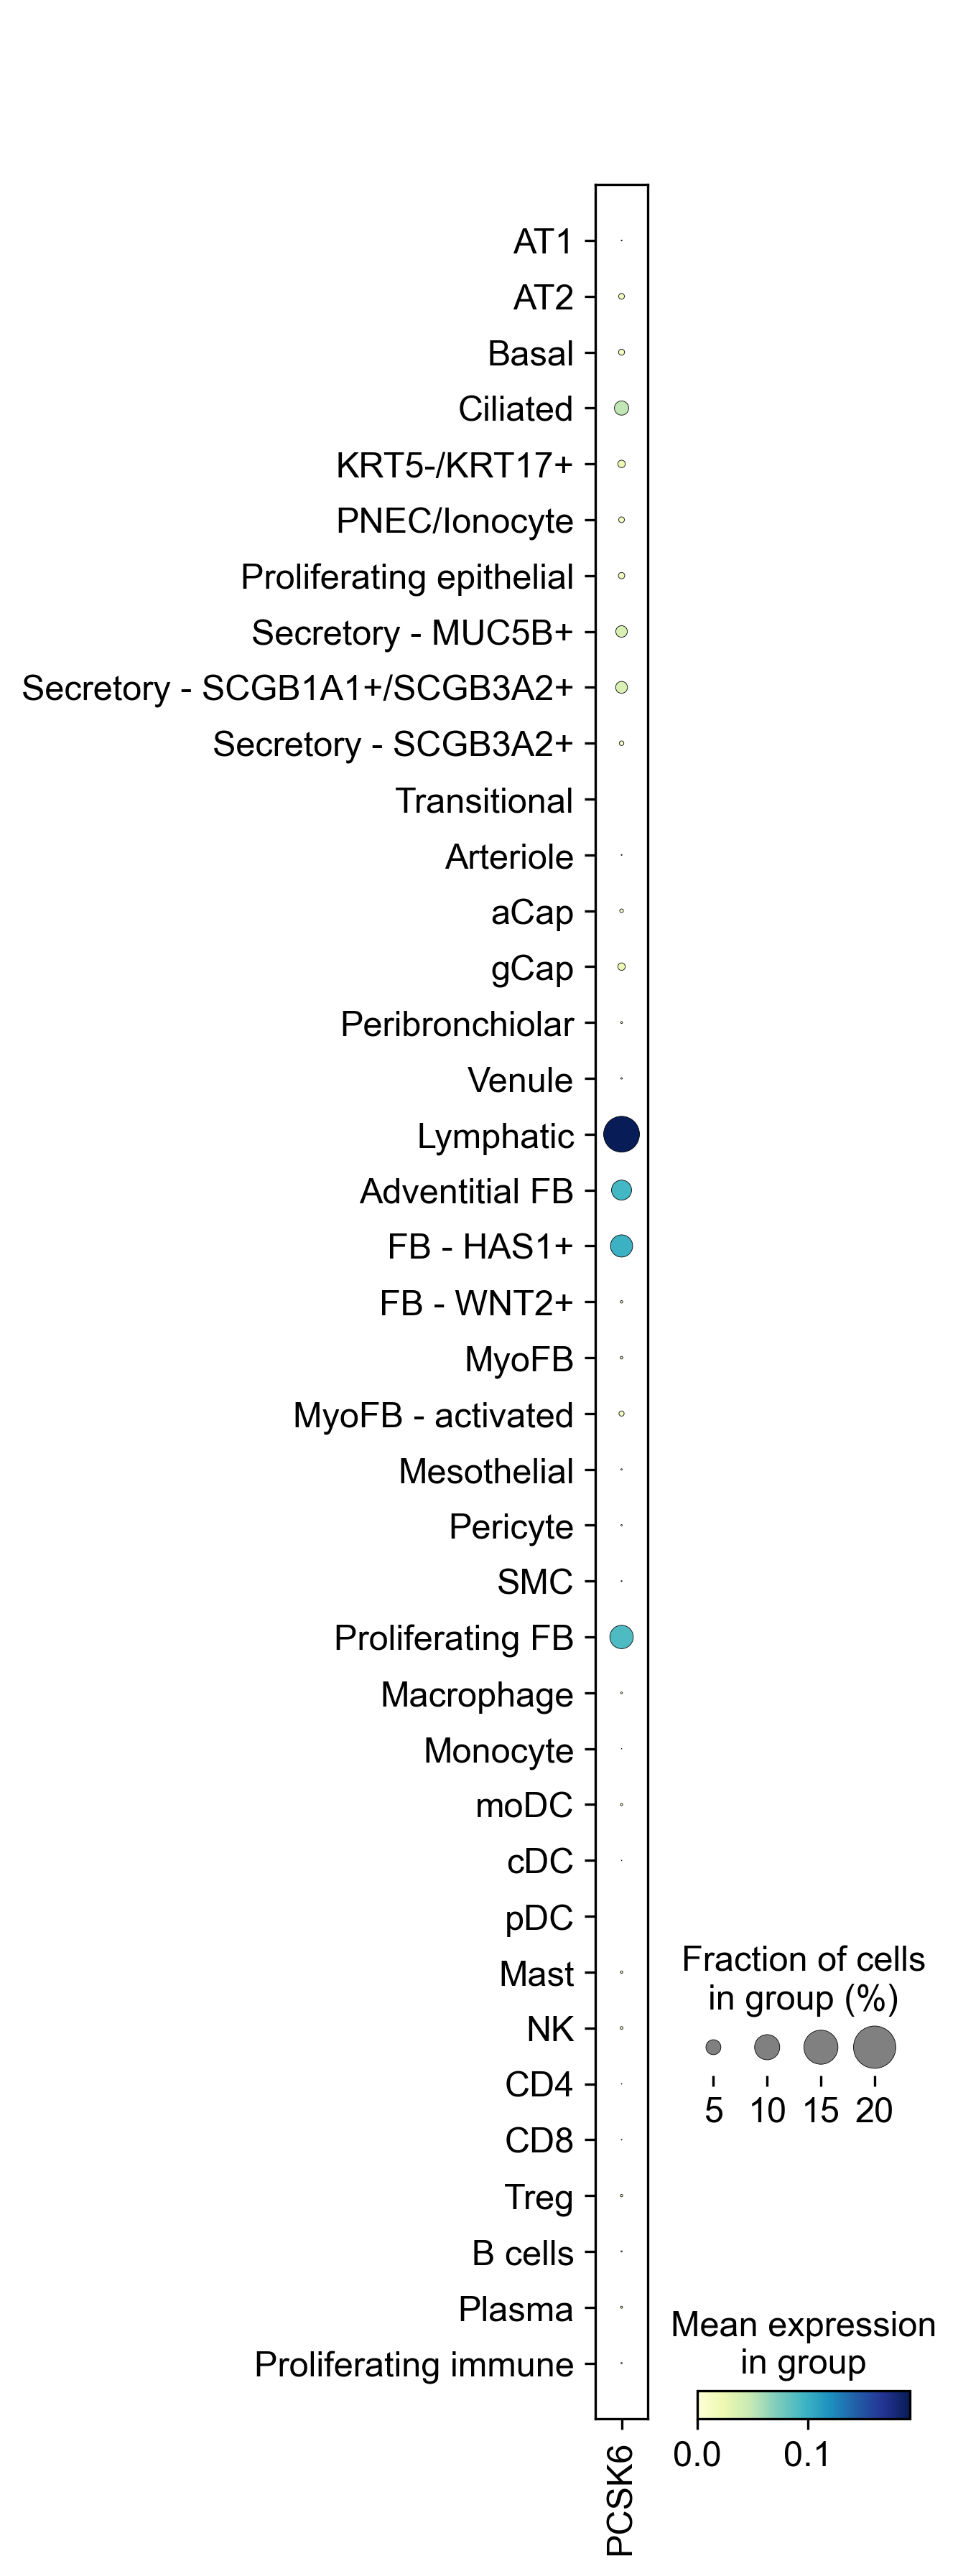

In [9]:
with rc_context({'figure.figsize': (2,1)}):
    sc.pl.dotplot(yale, ['PCSK6'], groupby='predicted.id', swap_axes=False, color_map = 'YlGnBu')
    sc.pl.dotplot(vumc, ['PCSK6'], groupby='predicted.id', swap_axes=False, color_map = 'YlGnBu')

In [ ]:
#results_file = './yale_annotated.h5ad'
#yale.write(results_file)

#results2 = './vumc_ipf.h5ad'
#vumc.write(results2)